Kami dari kelompok 2 PYTN-KS18 yang beranggotakan :
* Annisa Aprilia
* Rika Anggraini
* Rendhi Andrianto

## 1. Introduce



kami akan menganalisis data ini guna memenuhi tugas Final Project 1. Data ini merupakan kumpulan data mengenai penggunaan transportasi antara Uber dan Lyft Boston di Amerika/New York, attribut dari data ini anatar lain  weather, hour,   temperature, sunset, dan sebagainya. Pada data ini kita ingin mengprediksi harga dari penggunaan transportasi Uber dan Lyft dengan menggunakan pemodelan Linear Regression

## 2. Import Pustaka Yang dibutuhkan

In [60]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import scipy.stats as stats
from statsmodels.stats.diagnostic import normal_ad
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import mean_squared_error

pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', None)

## 3. Data Loading

In [2]:
df = pd.read_csv('rideshare_kaggle.csv')
df

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1544952607.89,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.00,0.44,1.00,42.21,-71.03,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.00,0.00,0.68,8.66,9.17,1545015600,10.00,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.00,303.80,1544962084,1544994864,0.30,0.13,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1543284023.68,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.00,0.44,1.00,42.21,-71.03,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.13,1.00,0.94,11.98,11.98,1543291200,4.79,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.79,291.10,1543232969,1543266992,0.64,0.13,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1543366822.20,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.00,0.44,1.00,42.21,-71.03,38.33,32.93,Clear,Light rain in the morning.,0.00,0.00,0.75,7.33,7.33,1543334400,10.00,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.00,315.70,1543319437,1543353364,0.68,0.11,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1543553582.75,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.00,0.44,1.00,42.21,-71.03,34.38,29.63,Clear,Partly cloudy throughout the day.,0.00,0.00,0.73,5.28,5.28,1543514400,10.00,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.00,291.10,1543492370,1543526114,0.75,0.00,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1543463360.22,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.00,0.44,1.00,42.21,-71.03,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.00,0.00,0.70,9.14,9.14,1543446000,10.00,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.00,347.70,1543405904,1543439738,0.72,0.00,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1543708386.00,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.00,1.00,1.00,42.35,-71.06,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.00,0.00,0.74,2.34,2.87,1543672800,9.79,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.79,271.50,1543665331,1543698855,0.82,0.00,1543

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
timestamp,693071.00,1544045709.76,689192.49,1543203646.00,1543443968.00,1543737478.00,1544827509.00,1545160511.00
hour,693071.00,11.62,6.95,0.00,6.00,12.00,18.00,23.00
day,693071.00,17.79,9.98,1.00,13.00,17.00,28.00,30.00
month,693071.00,11.59,0.49,11.00,11.00,12.00,12.00,12.00
price,637976.00,16.55,9.32,2.50,9.00,13.50,22.50,97.50
distance,693071.00,2.19,1.14,0.02,1.28,2.16,2.92,7.86
surge_multiplier,693071.00,1.01,0.09,1.00,1.00,1.00,1.00,3.00
latitude,693071.00,42.34,0.05,42.21,42.35,42.35,42.36,42.37
longitude,693071.00,-71.07,0.02,-71.11,-71.08,-71.06,-71.05,-71.03
temperature,693071.00,39.58,6.73,18.91,36.45,40.49,43.58,57.22


In [5]:
df.describe(include=object).T

,count,unique,top,freq
id,693071,693071,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1
datetime,693071,31350,2018-11-26 23:21:14,156
timezone,693071,1,America/New_York,693071
source,693071,12,Financial District,58857
destination,693071,12,Financial District,58851
cab_type,693071,2,Uber,385663
product_id,693071,13,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,55096
name,693071,13,UberXL,55096
short_summary,693071,9,Overcast,218895
long_summary,693071,11,Mostly cloudy throughout the day.,202340


## Kesimpulan 
Pada tahap loading data kita terlebih dahulu memamnggil data, mencari tahu info dari data, dan mengetahui nilai statistik deskritif dari data tersebut. Untuk syntax df.describe().T berfungsi mengubah/ mengtranspose baris menjadi kolom. 

## 4. Data Cleaning

In [6]:
df = df.drop(columns=['id', 'timezone', 'apparentTemperatureMaxTime', 'apparentTemperatureMinTime', 'temperatureMaxTime', 'temperatureMinTime',
                'uvIndexTime', 'sunsetTime', 'sunriseTime', 'apparentTemperatureLowTime', 'apparentTemperatureHighTime', 'temperatureLowTime',
                'temperatureHighTime', 'windGustTime', 'timestamp','moonPhase'])
df.sample(5)

,hour,day,month,datetime,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
159829,2,17,12,2018-12-17 02:25:09,Financial District,Fenway,Lyft,lyft_lux,Lux Black,30.00,3.80,1.00,42.35,-71.06,40.39,34.50,Light Rain,Rain throughout the day.,0.09,1.00,0.91,9.15,14.64,3.20,43.76,34.14,38.30,28.12,rain,37.83,1009.75,49,1.00,0,3.20,324.30,0.13,39.29,43.76,33.73,38.30
416060,20,28,11,2018-11-28 20:53:08,Boston University,Beacon Hill,Lyft,lyft_lux,Lux Black,22.50,2.71,1.00,42.36,-71.07,41.91,36.71,Overcast,Mostly cloudy throughout the day.,0.00,0.00,0.60,8.42,13.00,10.00,42.57,37.37,36.55,31.91,cloudy,29.05,992.85,295,1.00,0,10.00,355.00,0.00,33.70,42.57,29.94,36.55
441257,19,14,12,2018-12-14 19:45:06,Haymarket Square,Back Bay,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,13.00,2.30,1.00,42.37,-71.06,45.82,43.92,Partly Cloudy,Partly cloudy throughout the day.,0.00,0.00,0.53,4.16,4.16,9.87,46.61,40.76,43.85,38.58,partly-cloudy-day,29.78,1029.37,165,0.39,0,9.87,289.00,0.00,27.11,46.61,27.76,43.85
554243,13,27,11,2018-11-27 13:54:22,South Station,North Station,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,14.00,1.50,1.00,42.36,-71.07,44.94,42.13,Possible Drizzle,Light rain in the morning.,0.01,0.61,0.94,5.23,5.23,3.23,47.06,33.83,44.15,30.13,rain,43.32,988.09,227,1.00,0,3.23,322.80,0.14,36.37,47.06,32.40,44.15
542515,16,15,12,2018-12-15 16:40:09,Beacon Hill,Boston University,Lyft,lyft_luxsuv,Lux Black XL,27.50,2.30,1.00,42.36,-71.05,51.84,51.84,Partly Cloudy,Mostly cloudy throughout the day.,0.00,0.00,0.80,3.58,5.30,9.96,54.40,39.22,53.73,35.32,partly-cloudy-day,45.71,1021.39,262,0.48,1,9.96,299.50,0.01,39.78,54.40,36.64,53.73


In [7]:
df['icon'].value_counts()

icon
 cloudy                  218895
 partly-cloudy-night     158030
 partly-cloudy-day       115404
 rain                    104556
 clear-night              60294
 clear-day                26832
 fog                       9060
Name: count, dtype: int64

In [8]:
df['long_summary'].nunique()

11

In [9]:
df.groupby(['short_summary', 'long_summary'])['hour'].count()

short_summary       long_summary                                        
 Clear               Foggy in the morning.                                   3744
                     Light rain in the morning and overnight.                3744
                     Light rain in the morning.                              3900
                     Mostly cloudy throughout the day.                      34632
                     Partly cloudy throughout the day.                      37362
                     Rain throughout the day.                                3744
 Drizzle             Light rain in the morning.                              5616
                     Rain until morning, starting again in the evening.      1680
 Foggy               Foggy in the morning.                                   5616
                     Rain in the morning and afternoon.                        84
                     Rain until morning, starting again in the evening.      3360
 Light Rain          Ligh

In [10]:
lst_remove_temp = df.filter(regex='temperature|apparent', axis=1).columns.to_list()
lst_remove_temp.remove('temperature')
lst_remove_temp

['apparentTemperature',
 'temperatureHigh',
 'temperatureLow',
 'apparentTemperatureHigh',
 'apparentTemperatureLow',
 'temperatureMin',
 'temperatureMax',
 'apparentTemperatureMin',
 'apparentTemperatureMax']

In [11]:
df = df.drop(columns=['long_summary', 'icon', 'latitude', 'longitude'])
df = df.drop(columns='datetime')
df = df.drop(columns=lst_remove_temp)

In [12]:
df.sample()

,hour,day,month,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,temperature,short_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,precipIntensityMax
368112,11,17,12,Boston University,West End,Uber,6c84fd89-3f11-4782-9b50-97c468b19529,Black,20.50,3.04,1.00,34.87,Overcast,0.00,0.16,0.93,7.37,8.18,8.28,32.99,1004.23,340,1.00,0,8.28,326.20,0.02


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   hour                693071 non-null  int64  
 1   day                 693071 non-null  int64  
 2   month               693071 non-null  int64  
 3   source              693071 non-null  object 
 4   destination         693071 non-null  object 
 5   cab_type            693071 non-null  object 
 6   product_id          693071 non-null  object 
 7   name                693071 non-null  object 
 8   price               637976 non-null  float64
 9   distance            693071 non-null  float64
 10  surge_multiplier    693071 non-null  float64
 11  temperature         693071 non-null  float64
 12  short_summary       693071 non-null  object 
 13  precipIntensity     693071 non-null  float64
 14  precipProbability   693071 non-null  float64
 15  humidity            693071 non-nul

## Kesimpulan Data Cleaning 
pada proses data cleaning disini kita menghapus kolom yang tidak dipakai yaitu :
--> [id', 'timezone', 'apparentTemperatureMaxTime', 'apparentTemperatureMinTime', 'temperatureMaxTime', 'temperatureMinTime','uvIndexTime', 'sunsetTime', 'sunriseTime' 'apparentTemperatureLowTime', 'apparentTemperatureHighTime', 'temperatureLowTime','temperatureHighTime', 'windGustTime', 'timestamp', apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh','apparentTemperatureLow','temperatureMin','temperatureMax','apparentTemperatureMin','apparentTemperatureMax','long_summary','icon', 'latitude', dan 'longitude'].

ALASAN : 
* untuk columns temperature hanya menggunakan satu columns temperature saja yaitu columns temperature. kemudian columns temperature lainnya seperti apperenttemperatureMaxTime dan selanjutnya lebih baik untuk didrop karena tidak terlalu diperlukan.
 - untuk columns datetime di drop karena sudah ada columns hour, day, and mounth.
 - untuk  columns latitude, longitude, long_summary, icon, id, dan timezone di drop karena bukan angka sejati dan tidak keterurutan.
 - untuk columns moonphase di drop karena tidak terlalu relevan untuk di analisa.


## 4.1 Outlier

In [14]:
np.mean(df['price'])

16.545125490614065

In [15]:
print('hasil outlier menggunakan z-score yaitu :')
# menghitung outlier menggunkan z-score
cek_outlier = df['price']
# Menghitung z-score untuk setiap nilai

z_scores = np.abs(( cek_outlier- cek_outlier.mean()) / cek_outlier.std())

# Menentukan batas z-score untuk outlier (misalnya, z-score > 8) 
outliers = (z_scores > 8)

# Menampilkan baris yang berisi outlier
print(cek_outlier[outliers])

hasil outlier menggunakan z-score yaitu :
28083    92.00
75919    92.00
271719   92.00
280566   92.00
301021   92.00
440000   92.00
515785   92.00
537453   92.00
560058   92.00
597071   97.50
Name: price, dtype: float64


## Kesimpulan
z-score merupakan salah satu pengujian outlier, nilai z-score yang tinggi menunjukan adanya outlier pada suatu data. pada analisis kali ini kami mencari outlier pada columns price dan hasil nilai outlier > 9.00 adalah outlier dari columns price.

In [16]:
# Menghitung Q1, Q3, dan IQR
# Menghitung Q1, Q3, dan IQR
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3 - q1
# Mengidentifikasi outlier
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Menampilkan hasil
print("Kuartil Pertama (Q1):", q1)
print("Kuartil Ketiga (Q3):", q3)
print("Interquartile Range (IQR):", iqr)
print("Outliers:")
print(outliers)

Kuartil Pertama (Q1): 9.0
Kuartil Ketiga (Q3): 22.5
Interquartile Range (IQR): 13.5
Outliers:
        hour  day  month              source        destination cab_type  \
706       10   28     11       South Station           Back Bay     Lyft   
707        2   16     12       South Station           Back Bay     Lyft   
769       17   14     12    Theatre District  Boston University     Lyft   
1094      17    2     12    Theatre District             Fenway     Lyft   
1318      16   16     12  Financial District  Boston University     Lyft   
...      ...  ...    ...                 ...                ...      ...   
692439    20   17     12  Financial District  Boston University     Uber   
692698    10   14     12  Financial District             Fenway     Lyft   
692891     5    3     12  Financial District  Boston University     Lyft   
692962     4    2     12            Back Bay          North End     Uber   
693007    18   13     12            Back Bay          North End     Ub

## Kesimpulan outlier menggunakan metode IQR pandas
pada metode ini kami menyimpulkan outlier pada columns price yaitu :
 - 9.00 < x > 22.5 dimana x adalah outliers

## 4.2 Handling Missing Value

In [17]:
pd.DataFrame(df.isna().sum())

,0
hour,0
day,0
month,0
source,0
destination,0
cab_type,0
product_id,0
name,0
price,55095
distance,0


In [18]:
df = df[df['price'].notna()]
df.isna().any()

hour                  False
day                   False
month                 False
source                False
destination           False
cab_type              False
product_id            False
name                  False
price                 False
distance              False
surge_multiplier      False
temperature           False
short_summary         False
precipIntensity       False
precipProbability     False
humidity              False
windSpeed             False
windGust              False
visibility            False
dewPoint              False
pressure              False
windBearing           False
cloudCover            False
uvIndex               False
visibility.1          False
ozone                 False
precipIntensityMax    False
dtype: bool

## 5. Explorasi Data

Dalam proses explorasi data, hanya menggunakan beberapa kolom dari data frame yang ada diantaranya yaitu :
1. Hour             : kolom ini membantu mengetahui seberapa banyak customer menggunakan layanan transportasi Uber atau Lyft di setiap jamnya,    dan juga bisa digunakan untuk mengetahui kemungkinan kenaikan harga dari layanan transportasi tersebut di setiap jamnya misalnya rush hour atau faktor cuaca.
2. name             : kolom ini berfungsi untuk mengetahui jenis transportasi Uber atau Lyft yang digunakan.
3. Cab_type         : kolom ini befungsi untuk mengetahui apakah transportasi tersebut termasuk 'Uber' atau 'Lyft'
4. price            : kolom ini berfungsi untuk mengetahui harga yang akan dibayar saat menggunakan layanan transportasi Uber atau lyf hingga sampai ke tempat tujuan.
5. Destination     : kolom ini digunakan untuk mengetahui lokasi tujuan customer dalam layanan transportasi Uber atau Lyft
6. Surge_multiplier : kolom ini digunakan untuk mengetahui lonjakan harga pada saat tertentu.
7. Distance         : kolom ini digunakan untuk mengetahui jarak dari lokasi penjemputan/ titik awal sampai ke lokasi tujuan, distance ini juga biasanya digunakan sebagai penentu harga yang akan dibayar oleh customer.
8. Source           : kolom ini digunakan untuk mengetahui sumber yang biasanya sering menggunakan layanan transportasi Uber atau lyft.

dan untuk kolom yang lain tidak digunakan karena tidak terlalu relevan untuk di analisis.

In [19]:
data_pie = df[['hour','name','cab_type','destination','source','distance','surge_multiplier','price']]
data_pie

,hour,name,cab_type,destination,source,distance,surge_multiplier,price
0,9,Shared,Lyft,North Station,Haymarket Square,0.44,1.00,5.00
1,2,Lux,Lyft,North Station,Haymarket Square,0.44,1.00,11.00
2,1,Lyft,Lyft,North Station,Haymarket Square,0.44,1.00,7.00
3,4,Lux Black XL,Lyft,North Station,Haymarket Square,0.44,1.00,26.00
4,3,Lyft XL,Lyft,North Station,Haymarket Square,0.44,1.00,9.00
...,...,...,...,...,...,...,...,...
693065,23,WAV,Uber,North End,West End,1.00,1.00,9.50
693066,23,UberXL,Uber,North End,West End,1.00,1.00,13.00
693067,23,UberX,Uber,North End,West End,1.00,1.00,9.50
693069,23,Black SUV,Uber,North End,West End,1.00,1.00,27.00


In [20]:
data = df[['hour','distance','surge_multiplier','price']]
data

,hour,distance,surge_multiplier,price
0,9,0.44,1.00,5.00
1,2,0.44,1.00,11.00
2,1,0.44,1.00,7.00
3,4,0.44,1.00,26.00
4,3,0.44,1.00,9.00
...,...,...,...,...
693065,23,1.00,1.00,9.50
693066,23,1.00,1.00,13.00
693067,23,1.00,1.00,9.50
693069,23,1.00,1.00,27.00


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 637976 entries, 0 to 693070
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   hour              637976 non-null  int64  
 1   distance          637976 non-null  float64
 2   surge_multiplier  637976 non-null  float64
 3   price             637976 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 24.3 MB


## 5.1 Corelation Data

In [22]:
# Menghitung matriks korelasi
correlation_matrix = data.corr()
correlation_matrix


,hour,distance,surge_multiplier,price
hour,1.00,0.00,-0.00,0.00
distance,0.00,1.00,0.03,0.35
surge_multiplier,-0.00,0.03,1.00,0.24
price,0.00,0.35,0.24,1.00


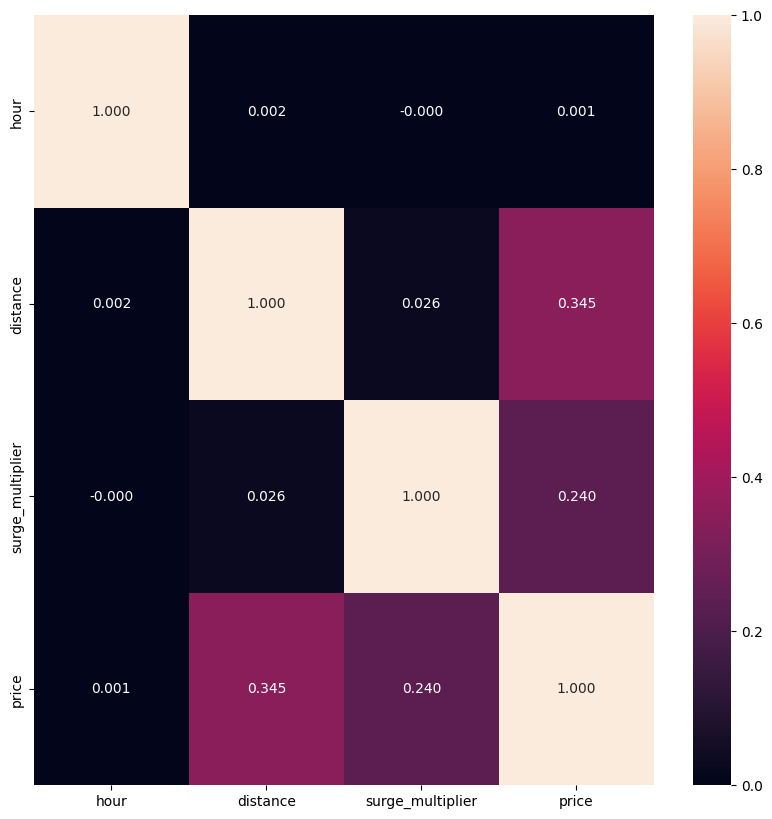

In [23]:
fig = plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, fmt=".3f")
plt.show()

## Kesimpulan data corelation matrix :
1. Variabel  yang memiliki korelasi terkuat dengan price adalah distance dan surge_multiplier.
2. Variabel  yang memiliki korelasi terkuat dengan surge_multiplier adalah price
3. Variabel  yang memiliki korelasi kuat dengan hour adalah distance 
4. Variabel  yang memiliki korelasi terkuat dengan distance adalah price

## 5.2 visualisasi data using barplot

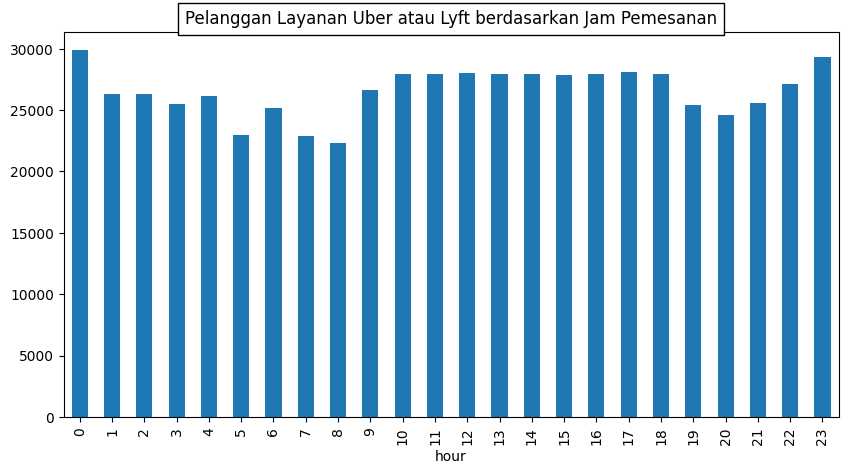

In [24]:
grouped1 = data[['hour']].groupby(['hour']).agg({'hour':'count'})
grouped1.plot(kind='bar', legend=False, figsize=(10,5))

#customize plot
plt.title("Pelanggan Layanan Uber atau Lyft berdasarkan Jam Pemesanan", bbox={'facecolor':'1', 'pad':5})

#menampilkan plot
plt.show()

dari visualisasi barplot diatas dapat disimpulkan bahwa penggunaan layanan transportasi Uber dan Lyft setiap jamnya banyak beroperasi pada pukul 23.00 dan pukul 00.00 dan jam operasi layanan transportasi paling dikit/ rendah customer terjadi pada pukul 08.00.

## 5.3 piechart

In [25]:
data_pie = df[['hour','name','cab_type','destination','source','distance','surge_multiplier','price']]
data_pie

,hour,name,cab_type,destination,source,distance,surge_multiplier,price
0,9,Shared,Lyft,North Station,Haymarket Square,0.44,1.00,5.00
1,2,Lux,Lyft,North Station,Haymarket Square,0.44,1.00,11.00
2,1,Lyft,Lyft,North Station,Haymarket Square,0.44,1.00,7.00
3,4,Lux Black XL,Lyft,North Station,Haymarket Square,0.44,1.00,26.00
4,3,Lyft XL,Lyft,North Station,Haymarket Square,0.44,1.00,9.00
...,...,...,...,...,...,...,...,...
693065,23,WAV,Uber,North End,West End,1.00,1.00,9.50
693066,23,UberXL,Uber,North End,West End,1.00,1.00,13.00
693067,23,UberX,Uber,North End,West End,1.00,1.00,9.50
693069,23,Black SUV,Uber,North End,West End,1.00,1.00,27.00


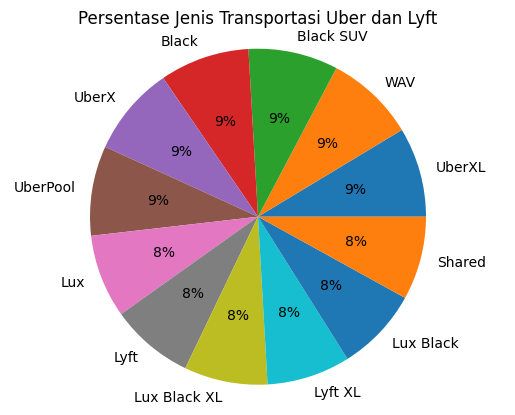

In [26]:
# Hitung jumlah penggunaan jenis transportsi Uber dan Lyft yang digunakan
Jenis_counts = data_pie['name'].value_counts()

# Mencari jumlah penggunaan jenis transportsi Uber dan Lyft yang digunakan
jumlah_terkecil = Jenis_counts.min()
jumlah_terbanyak = Jenis_counts.max()

plt.pie(Jenis_counts, labels=Jenis_counts.index, autopct='%.0f%%')
plt.title('Persentase Jenis Transportasi Uber dan Lyft')

# Membuat lingkaran berbentuk sempurna
plt.axis('equal')  

#menampilkan plot
plt.show()

In [27]:
analisa1 = data_pie.groupby(['name']).agg(Count=('name','count'), Price=('price','mean')).reset_index().sort_values(by='Price', ascending=False)
analisa1

,name,Count,Price
4,Lux Black XL,51235,32.32
1,Black SUV,55096,30.29
3,Lux Black,51235,23.06
0,Black,55095,20.52
2,Lux,51235,17.77
10,UberXL,55096,15.68
6,Lyft XL,51235,15.31
9,UberX,55094,9.77
11,WAV,55096,9.77
5,Lyft,51235,9.61


dari analisa1 diatas dapat disimpulkan bahwa penggunaan jenis Uber dan Lyft yang paling sering digunakan adalah Lux Black XL dengan harga 32.32 pada jarak tertentu, dan yang paling sedikit digunakan adalah jenis Shared dengan harga 6.03 pada jarak tertentu.

In [28]:
data_pie['source'].unique()

array(['Haymarket Square', 'Back Bay', 'North End', 'North Station',
       'Beacon Hill', 'Boston University', 'Fenway', 'South Station',
       'Theatre District', 'West End', 'Financial District',
       'Northeastern University'], dtype=object)

In [29]:
data_pie['destination'].unique()

array(['North Station', 'Northeastern University', 'West End',
       'Haymarket Square', 'South Station', 'Fenway', 'Theatre District',
       'Beacon Hill', 'Back Bay', 'North End', 'Financial District',
       'Boston University'], dtype=object)

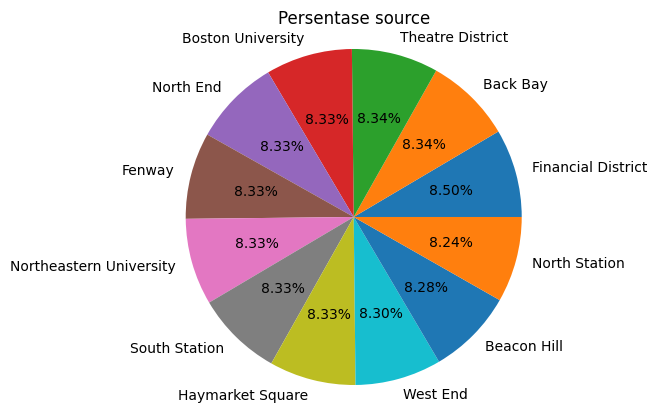

In [30]:
 # Hitung jumlah yang source
source_counts = data_pie['source'].value_counts()

plt.pie(source_counts, labels=source_counts.index, autopct='%1.2f%%')
plt.title('Persentase source')

# Membuat lingkaran berbentuk sempurna
plt.axis('equal')  

#menampilkan plot
plt.show()

In [31]:
analisa2= data_pie.groupby(['source']).agg(Count=('name','count'), Price=('price','mean')).reset_index().sort_values(by='Price', ascending=False)
analisa2

,source,Count,Price
2,Boston University,53172,18.85
3,Fenway,53166,18.38
4,Financial District,54197,18.18
8,Northeastern University,53164,17.90
10,Theatre District,53201,16.60
7,North Station,52576,16.36
11,West End,52980,16.11
0,Back Bay,53201,16.05
9,South Station,53160,15.67
1,Beacon Hill,52841,15.66


dari data dan piechart analisa2 dapat disimpulkan bahwa sumber dan tujuan yang sering menggunakan layanan Uberdan lyft adalah Boston University dengan tarif mencapai 18.85.

## 6. Data Preprocessing
Bagian ini berisi proses penyiapan data untuk proses pelatihan model

## 6.1 Encoding

In [32]:
object_columns = df.select_dtypes(include=['object']).columns.tolist()
numeric_columns = df.select_dtypes(exclude=['object']).columns.tolist()
object_columns

['source', 'destination', 'cab_type', 'product_id', 'name', 'short_summary']

In [33]:
df[object_columns].nunique()

source           12
destination      12
cab_type          2
product_id       12
name             12
short_summary     9
dtype: int64

In [34]:
encoded_df = df[object_columns]
not_encoded_df = df[numeric_columns]

In [35]:
df.to_pickle('df.pkl')

In [36]:
encoded_df = pd.get_dummies(encoded_df).astype('int')
df = pd.concat([not_encoded_df, encoded_df], axis = 1)
df.sample(3)

,hour,day,month,price,distance,surge_multiplier,temperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,precipIntensityMax,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,cab_type_Lyft,cab_type_Uber,product_id_55c66225-fbe7-4fd5-9072-eab1ece5e23e,product_id_6c84fd89-3f11-4782-9b50-97c468b19529,product_id_6d318bcc-22a3-4af6-bddd-b409bfce1546,product_id_6f72dfc5-27f1-42e8-84db-ccc7a75f6969,product_id_997acbb5-e102-41e1-b155-9df7de0a73f2,product_id_9a0e7b09-b92b-4c41-9779-2ad22b4d779d,product_id_lyft,product_id_lyft_line,product_id_lyft_lux,product_id_lyft_luxsuv,product_id_lyft_plus,product_id_lyft_premier,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,short_summary_ Clear,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain
42187,1,29,11,18.50,1.56,1.00,38.42,0.00,0.00,0.72,8.41,11.54,9.91,30.30,996.92,297,0.77,0,9.91,349.90,0.00,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
277453,2,29,11,9.00,1.72,1.00,37.92,0.00,0.00,0.71,8.28,12.43,9.98,29.42,997.37,305,0.75,0,9.98,348.90,0.00,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
252574,2,30,11,8.50,1.92,1.00,37.11,0.00,0.00,0.67,6.68,8.53,9.97,27.27,1011.84,318,0.03,0,9.97,296.90,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0


## 6.2 Normalization

In [37]:
# Initialize the RobustScaler
scaler = RobustScaler()

# Fit the scaler on your data and transform the data
scaled_data = scaler.fit_transform(df)

# Convert the scaled data back to a DataFrame for easier analysis (optional)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

In [38]:
scaled_df.head()

,hour,day,month,price,distance,surge_multiplier,temperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,precipIntensityMax,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,cab_type_Lyft,cab_type_Uber,product_id_55c66225-fbe7-4fd5-9072-eab1ece5e23e,product_id_6c84fd89-3f11-4782-9b50-97c468b19529,product_id_6d318bcc-22a3-4af6-bddd-b409bfce1546,product_id_6f72dfc5-27f1-42e8-84db-ccc7a75f6969,product_id_997acbb5-e102-41e1-b155-9df7de0a73f2,product_id_9a0e7b09-b92b-4c41-9779-2ad22b4d779d,product_id_lyft,product_id_lyft_line,product_id_lyft_lux,product_id_lyft_luxsuv,product_id_lyft_plus,product_id_lyft_premier,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,short_summary_ Clear,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain
0,-0.25,-0.07,0.00,-0.63,-1.04,0.00,0.26,0.00,0.00,-0.12,0.55,0.21,0.08,0.19,0.58,-1.12,-0.16,0.00,0.08,-0.09,1.39,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
1,-0.83,0.67,-1.00,-0.19,-1.04,0.00,0.43,0.13,1.00,0.96,1.21,0.58,-3.26,1.05,-0.24,-0.94,0.29,0.00,-3.26,-0.40,1.41,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
2,-0.92,0.73,-1.00,-0.48,-1.04,0.00,-0.30,0.00,0.00,0.17,0.28,-0.03,0.08,0.04,-0.77,-0.10,-1.25,0.00,0.08,0.20,1.16,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,-0.67,0.87,-1.00,0.93,-1.04,0.00,-0.86,0.00,0.00,0.08,-0.13,-0.30,0.08,-0.38,0.20,0.29,-1.30,0.00,0.08,-0.40,-0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,-0.75,0.80,-1.00,-0.33,-1.04,0.00,-0.43,0.00,0.00,-0.04,0.65,0.21,0.08,-0.20,-0.49,0.25,-0.60,0.00,0.08,0.99,-0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00


In [39]:
X = scaled_df.drop(columns='price')
y = scaled_df['price']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

# 7 Pendefinisian Model

In [41]:
lr = LinearRegression()
lr

LinearRegression()

# 8 Pelatihan Model

In [42]:
lr.fit(X_train, y_train)

LinearRegression()

# 9 Evaluasi Model

In [43]:
y_pred = lr.predict(X_test)

In [44]:
mean_squared_error(y_test, y_pred)

0.03405012365353723

In [45]:
r_sq_train = lr.score(X_train,y_train)
print('Coefficient of determination training data:',r_sq_train)
r_sq_test = lr.score(X_test,y_test)
print('Coefficient of determination testing data:',r_sq_test)
print('Intercept:',lr.intercept_)
print('Slope:',lr.coef_)

Coefficient of determination training data: 0.9286333746346932
Coefficient of determination testing data: 0.928521080411884
Intercept: -208827576133.78488
Slope: [ 2.15016946e-04 -1.76474929e-03 -1.98442630e-03  3.54738090e-01
  1.37308102e+00  5.61464338e-04  3.50252282e-03  5.07791911e-03
  1.07750304e-03 -2.76868941e-03  3.08555894e-03  2.88421941e+10
 -3.19980414e-04  3.91005301e-04  6.10898182e-04 -6.33906408e-03
 -9.88083077e-04 -2.88421941e+10  2.84784040e-04  5.41371899e-04
  9.38107972e+10  9.38107972e+10  5.77002121e+09  5.77002121e+09
  9.38107972e+10  5.77002121e+09  5.77002121e+09  9.38107972e+10
  5.77002121e+09  5.77002121e+09  9.38107972e+10  9.38107972e+10
  9.12604102e+10  9.12604102e+10  3.21963418e+09  3.21963418e+09
  9.12604102e+10  3.21963418e+09  3.21963418e+09  9.12604102e+10
  3.21963418e+09  3.21963418e+09  9.12604102e+10  9.12604102e+10
  1.06529703e+11 -7.40224033e+10  5.25811483e+10  3.80605286e+10
 -1.22449111e+11 -5.33128277e+11  8.82287732e+11  4.340140

Dari output penilaian diatas diperoleh keakuratan data training bernilai 92.08% kemudian tingkat keakuratan dari testing data bernilai 92.19%.Dapat dilihat bahwasannya besarnya nilai testing data ini dapat dinyatakan sebagai overfitting karena overfitting merupakan kondisi di mana model pembelajaran mesin terlalu "memahami" atau menyesuaikan diri dengan data pelatihan secara berlebihan, sehingga kinerjanya menjadi buruk saat diuji dengan data yang belum pernah dilihat sebelumnya (data uji).Meskipun, selisih dari akurasi tidak terlalu signifikan.

# 10 Model Inference

In [46]:
X_train.sample()

,hour,day,month,distance,surge_multiplier,temperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,precipIntensityMax,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,cab_type_Lyft,cab_type_Uber,product_id_55c66225-fbe7-4fd5-9072-eab1ece5e23e,product_id_6c84fd89-3f11-4782-9b50-97c468b19529,product_id_6d318bcc-22a3-4af6-bddd-b409bfce1546,product_id_6f72dfc5-27f1-42e8-84db-ccc7a75f6969,product_id_997acbb5-e102-41e1-b155-9df7de0a73f2,product_id_9a0e7b09-b92b-4c41-9779-2ad22b4d779d,product_id_lyft,product_id_lyft_line,product_id_lyft_lux,product_id_lyft_luxsuv,product_id_lyft_plus,product_id_lyft_premier,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,short_summary_ Clear,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain
447451,-0.17,-0.27,0.00,-0.68,0.00,-2.82,0.00,0.00,-0.21,-0.59,-0.56,-0.03,-1.86,1.01,-1.43,-1.25,0.00,-0.03,0.49,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [53]:
# mencari probability distribution pada kolom price
X_new = df['price']
mean = statistics.mean(X_new)
std_dev = statistics.stdev(X_new)

# Menghitung distribusi probabilitas untuk setiap nilai dalam X_new
probabilities = stats.norm.pdf(X_new, mean, std_dev)

print("Probabilities:", probabilities)


Probabilities: [0.01987885 0.03585048 0.02533609 ... 0.03216086 0.022819   0.03344251]


In [54]:
# mencari confidence intervals
X_new = df['price']
# Menghitung mean dan standard deviation
mean_value = np.mean(X_new)
std_dev = np.std(X_new, ddof=1)  # ddof=1 untuk menggunakan sample standard deviation

# Menghitung confidence interval dengan tingkat kepercayaan 95%
confidence_interval = stats.t.interval(0.95, len(X_new) - 1, loc=mean_value, scale=stats.sem(X_new))

print("Mean:", mean_value)
print("Confidence Interval (95%):", confidence_interval)


Mean: 16.545125490614065
Confidence Interval (95%): (16.5222449800685, 16.56800600115963)


# mencari Hypothesis Testing

In [61]:
p_value = normal_ad(df['price'])
p_value

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\_adnorm.py:67: RuntimeWarning: divide by zero encountered in log1p
  s = np.sum((2 * i[sl1] - 1.0) / nobs * (np.log(z) + np.log1p(-z[sl2])),


(inf, 0.0)

$Ho$ ditolak karena p-value lebih kecil dari 0.05. Maka dari itu distribusi dari harga Uber dan Lyft tidak terdistribuse secara normal.

## 11. Kesimpulan

In [48]:
lr.coef_

array([ 2.15016946e-04, -1.76474929e-03, -1.98442630e-03,  3.54738090e-01,
        1.37308102e+00,  5.61464338e-04,  3.50252282e-03,  5.07791911e-03,
        1.07750304e-03, -2.76868941e-03,  3.08555894e-03,  2.88421941e+10,
       -3.19980414e-04,  3.91005301e-04,  6.10898182e-04, -6.33906408e-03,
       -9.88083077e-04, -2.88421941e+10,  2.84784040e-04,  5.41371899e-04,
        9.38107972e+10,  9.38107972e+10,  5.77002121e+09,  5.77002121e+09,
        9.38107972e+10,  5.77002121e+09,  5.77002121e+09,  9.38107972e+10,
        5.77002121e+09,  5.77002121e+09,  9.38107972e+10,  9.38107972e+10,
        9.12604102e+10,  9.12604102e+10,  3.21963418e+09,  3.21963418e+09,
        9.12604102e+10,  3.21963418e+09,  3.21963418e+09,  9.12604102e+10,
        3.21963418e+09,  3.21963418e+09,  9.12604102e+10,  9.12604102e+10,
        1.06529703e+11, -7.40224033e+10,  5.25811483e+10,  3.80605286e+10,
       -1.22449111e+11, -5.33128277e+11,  8.82287732e+11,  4.34014085e+10,
       -2.56768486e+11, -

Dari output penilaian diatas diperoleh keakuratan data training bernilai 92.08% kemudian tingkat keakuratan dari testing data bernilai 92.19%.Dapat dilihat bahwasannya besarnya nilai testing data ini dapat dinyatakan sebagai overfitting karena overfitting merupakan kondisi di mana model pembelajaran mesin terlalu "memahami" atau menyesuaikan diri dengan data pelatihan secara berlebihan, sehingga kinerjanya menjadi buruk saat diuji dengan data yang belum pernah dilihat sebelumnya (data uji).Meskipun, selisih dari akurasi tidak terlalu signifikan.

In [49]:
lr.intercept_

-208827576133.78488

adanya intercept, kita bisa lebih memahami dan menginterpretasikan bagaimana variabel dependen bereaksi terhadap variasi dalam variabel independen. Dari hasil analisis kami, kami mendapatkan nilai intercept dengan hasil -208827576133.78488